# Neural Language Model

## Question

- Trigram-based Neural LM

## Trigram Model

In [ ]:
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical, plot_model
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding


# generate a sequence from a language model
def generate_seq(model, tokenizer, max_length, seed_text, n_words):
    in_text = seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # pre-pad sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')
        # predict probabilities for each word
        yhat = model.predict_classes(encoded, verbose=0)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text += ' ' + out_word
    return in_text


# source text
data = """ Jack and Jill went up the hill\n
		To fetch a pail of water\n
		Jack fell down and broke his crown\n
		And Jill came tumbling after\n """
# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
encoded = tokenizer.texts_to_sequences([data])[0]
# retrieve vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# encode 2 words -> 1 word
sequences = list()
for i in range(2, len(encoded)):
    sequence = encoded[i - 2:i + 1]
    sequences.append(sequence)
print('Total Sequences: %d' % len(sequences))
# pad sequences
max_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')
print('Max Sequence Length: %d' % max_length)
# split into input and output elements
sequences = array(sequences)
X, y = sequences[:, :-1], sequences[:, -1]
y = to_categorical(y, num_classes=vocab_size)
# define model
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=max_length - 1))
model.add(LSTM(50))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())
# compile network
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# fit network
model.fit(X, y, epochs=500, verbose=2)

In [ ]:
plot_model(model)

In [ ]:
# evaluate model
print(generate_seq(model, tokenizer, max_length-1, 'Jack and', 5))
print(generate_seq(model, tokenizer, max_length-1, 'And Jill', 3))
print(generate_seq(model, tokenizer, max_length-1, 'fell down', 5))
print(generate_seq(model, tokenizer, max_length-1, 'pail of', 5))

## Question 2

Line-based LM

## Line-based Model

In [36]:
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical, plot_model
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding


# generate a sequence from a language model
def generate_seq(model, tokenizer, max_length, seed_text, n_words):
    in_text = seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # pre-pad sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')
        # predict probabilities for each word
        yhat = model.predict_classes(encoded, verbose=0)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text += ' ' + out_word
    return in_text


# source text
data = """ Jack and Jill went up the hill\n
            To fetch a pail of water\n
            Jack fell down and broke his crown\n
            And Jill came tumbling after\n """
# prepare the tokenizer on the source text
tokenizer = Tokenizer(oov_token=1)  ## specify the word id for unknown words
tokenizer.fit_on_texts([data])

# determine the vocabulary size
## zero index is reserved in keras as the padding token (+1) and one unknown word id
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# create line-based sequences
sequences = list()
for line in data.split('\n'):
    encoded = tokenizer.texts_to_sequences([line])[0]
    ## For each line, after converting words into indexes
    ## prepare sequences for training
    ## given a line, w1,w2,w3,w4
    ## create input sequences:
    ## w1,w2
    ## w1,w2,w3
    ## w1,w2,w3,w4
    for i in range(1, len(encoded)):
        sequence = encoded[:i + 1]
        sequences.append(sequence)
print('Total Sequences: %d' % len(sequences))

Vocabulary Size: 23
Total Sequences: 21


In [38]:
# pad input sequences
max_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')
print('Max Sequence Length: %d' % max_length)

# split into input and output elements
sequences = array(sequences)
X, y = sequences[:, :-1], sequences[:, -1]
y = to_categorical(y, num_classes=vocab_size)
# define model
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=max_length - 1))
model.add(LSTM(50))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())
# compile network
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# fit network
model.fit(X, y, epochs=500, verbose=2)

Max Sequence Length: 7
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 6, 10)             230       
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                12200     
_________________________________________________________________
dense_2 (Dense)              (None, 23)                1173      
Total params: 13,603
Trainable params: 13,603
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
1/1 - 0s - loss: 3.1351 - accuracy: 0.0952
Epoch 2/500
1/1 - 0s - loss: 3.1335 - accuracy: 0.1905
Epoch 3/500
1/1 - 0s - loss: 3.1319 - accuracy: 0.1905
Epoch 4/500
1/1 - 0s - loss: 3.1302 - accuracy: 0.1429
Epoch 5/500
1/1 - 0s - loss: 3.1286 - accuracy: 0.1429
Epoch 6/500
1/1 - 0s - loss: 3.1269 - accuracy: 0.0952
Epoch 7/500
1/1 - 0s -

Epoch 133/500
1/1 - 0s - loss: 1.2349 - accuracy: 0.6190
Epoch 134/500
1/1 - 0s - loss: 1.2253 - accuracy: 0.6190
Epoch 135/500
1/1 - 0s - loss: 1.2160 - accuracy: 0.6190
Epoch 136/500
1/1 - 0s - loss: 1.2066 - accuracy: 0.6667
Epoch 137/500
1/1 - 0s - loss: 1.1966 - accuracy: 0.6190
Epoch 138/500
1/1 - 0s - loss: 1.1866 - accuracy: 0.6667
Epoch 139/500
1/1 - 0s - loss: 1.1777 - accuracy: 0.6667
Epoch 140/500
1/1 - 0s - loss: 1.1688 - accuracy: 0.6190
Epoch 141/500
1/1 - 0s - loss: 1.1591 - accuracy: 0.6667
Epoch 142/500
1/1 - 0s - loss: 1.1499 - accuracy: 0.6667
Epoch 143/500
1/1 - 0s - loss: 1.1413 - accuracy: 0.6667
Epoch 144/500
1/1 - 0s - loss: 1.1322 - accuracy: 0.7143
Epoch 145/500
1/1 - 0s - loss: 1.1229 - accuracy: 0.7143
Epoch 146/500
1/1 - 0s - loss: 1.1143 - accuracy: 0.7143
Epoch 147/500
1/1 - 0s - loss: 1.1057 - accuracy: 0.7143
Epoch 148/500
1/1 - 0s - loss: 1.0969 - accuracy: 0.7143
Epoch 149/500
1/1 - 0s - loss: 1.0882 - accuracy: 0.7143
Epoch 150/500
1/1 - 0s - loss: 

Epoch 277/500
1/1 - 0s - loss: 0.4510 - accuracy: 0.9048
Epoch 278/500
1/1 - 0s - loss: 0.4484 - accuracy: 0.9048
Epoch 279/500
1/1 - 0s - loss: 0.4459 - accuracy: 0.9048
Epoch 280/500
1/1 - 0s - loss: 0.4434 - accuracy: 0.9048
Epoch 281/500
1/1 - 0s - loss: 0.4411 - accuracy: 0.9048
Epoch 282/500
1/1 - 0s - loss: 0.4387 - accuracy: 0.9048
Epoch 283/500
1/1 - 0s - loss: 0.4364 - accuracy: 0.9048
Epoch 284/500
1/1 - 0s - loss: 0.4338 - accuracy: 0.9048
Epoch 285/500
1/1 - 0s - loss: 0.4311 - accuracy: 0.9048
Epoch 286/500
1/1 - 0s - loss: 0.4282 - accuracy: 0.9048
Epoch 287/500
1/1 - 0s - loss: 0.4256 - accuracy: 0.9048
Epoch 288/500
1/1 - 0s - loss: 0.4232 - accuracy: 0.9048
Epoch 289/500
1/1 - 0s - loss: 0.4210 - accuracy: 0.9048
Epoch 290/500
1/1 - 0s - loss: 0.4187 - accuracy: 0.9048
Epoch 291/500
1/1 - 0s - loss: 0.4163 - accuracy: 0.9048
Epoch 292/500
1/1 - 0s - loss: 0.4137 - accuracy: 0.9048
Epoch 293/500
1/1 - 0s - loss: 0.4113 - accuracy: 0.9048
Epoch 294/500
1/1 - 0s - loss: 

Epoch 421/500
1/1 - 0s - loss: 0.1951 - accuracy: 0.9524
Epoch 422/500
1/1 - 0s - loss: 0.1940 - accuracy: 0.9524
Epoch 423/500
1/1 - 0s - loss: 0.1928 - accuracy: 0.9524
Epoch 424/500
1/1 - 0s - loss: 0.1917 - accuracy: 0.9524
Epoch 425/500
1/1 - 0s - loss: 0.1906 - accuracy: 0.9524
Epoch 426/500
1/1 - 0s - loss: 0.1895 - accuracy: 0.9524
Epoch 427/500
1/1 - 0s - loss: 0.1884 - accuracy: 0.9524
Epoch 428/500
1/1 - 0s - loss: 0.1873 - accuracy: 0.9524
Epoch 429/500
1/1 - 0s - loss: 0.1862 - accuracy: 0.9524
Epoch 430/500
1/1 - 0s - loss: 0.1852 - accuracy: 0.9524
Epoch 431/500
1/1 - 0s - loss: 0.1841 - accuracy: 0.9524
Epoch 432/500
1/1 - 0s - loss: 0.1831 - accuracy: 0.9524
Epoch 433/500
1/1 - 0s - loss: 0.1820 - accuracy: 0.9524
Epoch 434/500
1/1 - 0s - loss: 0.1810 - accuracy: 0.9524
Epoch 435/500
1/1 - 0s - loss: 0.1800 - accuracy: 0.9524
Epoch 436/500
1/1 - 0s - loss: 0.1790 - accuracy: 0.9524
Epoch 437/500
1/1 - 0s - loss: 0.1780 - accuracy: 0.9524
Epoch 438/500
1/1 - 0s - loss: 

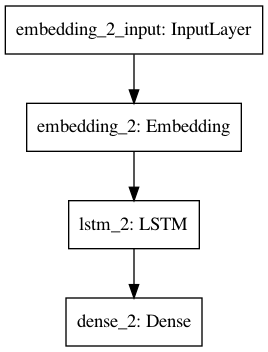

In [39]:
plot_model(model)

In [41]:
# evaluate model
print(generate_seq(model, tokenizer, max_length-1, 'Jack', 4))
print(generate_seq(model, tokenizer, max_length-1, 'Jill', 4))

Jack fell down and broke
Jill jill came tumbling after
